<a href="https://colab.research.google.com/github/dangduong2806/google-colab/blob/main/test_LSTM_in%2Bpaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Conv1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd

In [15]:
from google.colab import files
uploaded = files.upload()

Saving colors1.csv to colors1.csv


In [16]:
np.random.seed(10)
data = pd.read_csv("colors1.csv")
names = data["name"]

maxlen = 100
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = sequence.pad_sequences(tokenized, maxlen=maxlen)

In [17]:
def scale(n):
    return int(n * 255)

In [18]:
normalized_values = np.column_stack([data["red"], data["green"], data["blue"]])
normalized_values = normalized_values / 255.0

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1),
    normalized_values,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

In [20]:
!pip install colormath

In [23]:
model = Sequential()
model.add(Conv1D(256, kernel_size=3, activation='relu', input_shape=(maxlen, 3)))
model.add(Bidirectional(LSTM(256, activation='tanh')))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.weights.h5',  # Must end with .weights.h5
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [25]:
 earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [26]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=350,
                    batch_size=512,
                    shuffle = True,
                    callbacks=[checkpoint, earlystop])

Epoch 1/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1575 - mae: 0.3156
Epoch 1: val_loss improved from inf to 0.07608, saving model to best_model.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.1571 - mae: 0.3151 - val_loss: 0.0761 - val_mae: 0.2378
Epoch 2/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1371 - mae: 0.2916
Epoch 2: val_loss improved from 0.07608 to 0.07467, saving model to best_model.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 0.1371 - mae: 0.2916 - val_loss: 0.0747 - val_mae: 0.2356
Epoch 3/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.1374 - mae: 0.2901
Epoch 3: val_loss did not improve from 0.07467
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.1374 - mae: 0.2902 - val_loss: 0.0837 - val_mae: 0.2485
Epoch 4/350
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1405 - mae: 0.2954
Epoch 4: val_loss did not improve from 0.07467
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.1404 - mae: 0.2953 - val_loss:

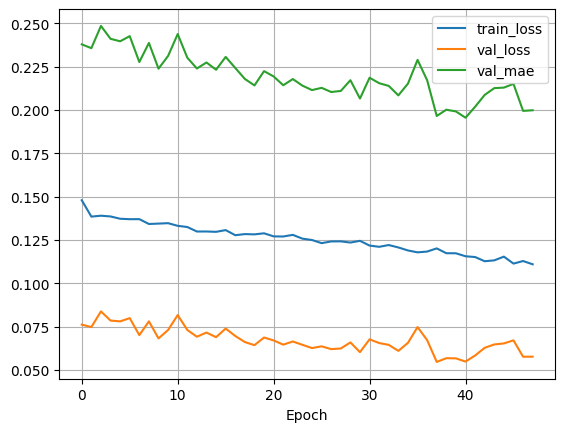

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2, 2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [33]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = sequence.pad_sequences(tokenized, maxlen=maxlen)
    pred = model.predict(np.repeat(padded[:, :, np.newaxis], 3, axis=-1))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r, g, b)
    plot_rgb(pred)

In [35]:

import matplotlib.pyplot as plt

Lemon Yellow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
lemon yellow, R,G,B: 199 179 86


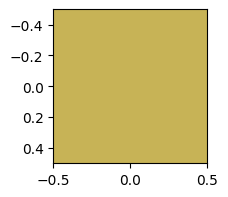

In [36]:
n = input()
predict(n)

Sky Blue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
sky blue, R,G,B: 110 153 162


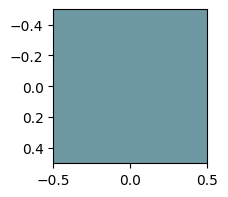

In [37]:
n = input()
predict(n)

Cucumber
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
cucumber, R,G,B: 151 135 94


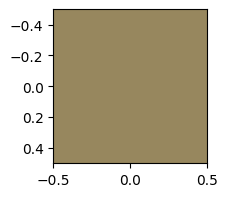

In [38]:
n = input()
predict(n)

Ocean
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
ocean, R,G,B: 70 108 116


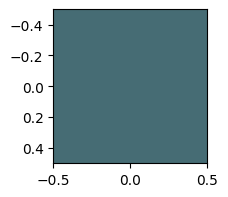

In [39]:
n = input()
predict(n)

Evaluate

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_val, y_train, y_val = train_test_split(
    np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1),
    normalized_values,
    test_size=0.3,
    shuffle=True,
    random_state=42
)

In [43]:

model.load_weights("best_model.weights.h5")

In [44]:
y_pred = model.predict(X_val)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [45]:
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000
import numpy as np

def compute_ciede2000_each_point(y_true, y_pred):
    delta_e_list = []
    for true_rgb, pred_rgb in zip(y_true, y_pred):
        c1 = sRGBColor(*true_rgb, is_upscaled=True)
        c2 = sRGBColor(*pred_rgb, is_upscaled=True)
        lab1 = convert_color(c1, LabColor)
        lab2 = convert_color(c2, LabColor)
        delta_e = float(delta_e_cie2000(lab1, lab2))
        delta_e_list.append(delta_e)
    return delta_e_list

# Scale về [0, 255] nếu cần
y_true_scaled = np.clip(y_val * 255, 0, 255)
y_pred_scaled = np.clip(y_pred * 255, 0, 255)

delta_e_list = compute_ciede2000_each_point(y_true_scaled, y_pred_scaled)


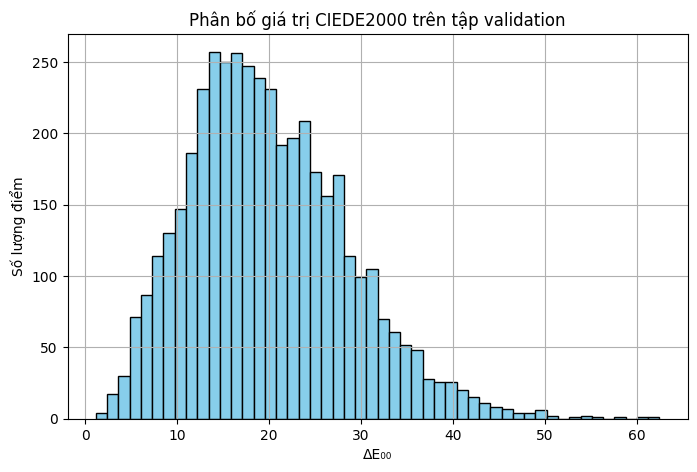

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(delta_e_list, bins=50, color='skyblue', edgecolor='black')
plt.title("Phân bố giá trị CIEDE2000 trên tập validation")
plt.xlabel("ΔE₀₀")
plt.ylabel("Số lượng điểm")
plt.grid(True)
plt.show()


In [47]:
results = model.evaluate(X_val, y_val)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0540 - mae: 0.1953


In [49]:
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

loss: 0.0519
compile_metrics: 0.1913
